# Problem statement

In [2]:
#To determine outcome of the harvest season- whether the crop would be healthy(alive),damaged by pesticide or due to other reasons

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from sklearn.preprocessing import LabelEncoder

In [4]:
# Importing the libraries for analysis
#Train Data-Agriculture

In [5]:
df=pd.read_csv('train_agriculture.csv')
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [6]:
""""
Data Description:-

ID - Unique ID
Estimated_Insects_Count- Estimated Insects count per square meter
Crop_Type - Category of crop (0,1)
Soil_Type -Category of soil (0,1)
Pesticide_Use_Category - Type of pesticide uses (1-Never,2-Previously used,3-Currently using)
Number_Doses_Week - No. of doses per week
Number_Weeks_Used - No of weeks used
Number_Weeks_Quit - No of weeks quit
Season - Season category(1,2,3)
Crop_Damage -Crop damage category(0=alive,1=Damage due to other causes,2=Damage due to pesticide)
"""

'"\nData Description:-\n\nID - Unique ID\nEstimated_Insects_Count- Estimated Insects count per square meter\nCrop_Type - Category of crop (0,1)\nSoil_Type -Category of soil (0,1)\nPesticide_Use_Category - Type of pesticide uses (1-Never,2-Previously used,3-Currently using)\nNumber_Doses_Week - No. of doses per week\nNumber_Weeks_Used - No of weeks used\nNumber_Weeks_Quit - No of weeks quit\nSeason - Season category(1,2,3)\nCrop_Damage -Crop damage category(0=alive,1=Damage due to other causes,2=Damage due to pesticide)\n'

In [7]:
df.shape

(4599, 10)

In [8]:
#There are 4599 rows and 10 columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [10]:
#Unique ID is object type, Number_Weeks_Used is float rest int type

In [11]:
df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [12]:
#Rest all have null values except Number_Weeks_Used

In [13]:
df['Number_Weeks_Used']=df['Number_Weeks_Used'].fillna((df['Number_Weeks_Used'].mean()))

In [14]:
# The null values of Number_Weeks_Used has been filled with the mean value

In [15]:
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [16]:
#Now there is no null values

In [17]:
df['Number_Weeks_Used'].unique()

array([ 0.        , 28.89102718, 26.        , 20.        , 15.        ,
       14.        , 19.        , 24.        ,  8.        , 23.        ,
       25.        , 28.        , 29.        , 22.        , 21.        ,
       17.        , 30.        , 35.        , 32.        , 27.        ,
       16.        , 31.        , 33.        , 34.        , 39.        ,
       38.        , 42.        , 40.        , 41.        , 36.        ,
       44.        , 37.        , 46.        , 45.        , 47.        ,
       43.        , 50.        , 10.        , 49.        , 53.        ,
       48.        , 51.        , 54.        , 52.        , 55.        ,
       56.        , 61.        , 18.        , 57.        , 62.        ,
       60.        , 63.        , 66.        , 59.        , 64.        ,
       13.        ,  7.        ,  5.        , 12.        ,  6.        ,
        9.        , 58.        , 11.        , 65.        ])

In [18]:
#Finding unique values of no of weeks used and in next step changing to int

In [19]:
df['Number_Weeks_Used']=df['Number_Weeks_Used'].astype(int)

In [20]:
le=LabelEncoder()

In [21]:
df['ID']=le.fit_transform(df['ID'])

In [22]:
#Changing ID type to numeric numbers from object type

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   ID                       4599 non-null   int32
 1   Estimated_Insects_Count  4599 non-null   int64
 2   Crop_Type                4599 non-null   int64
 3   Soil_Type                4599 non-null   int64
 4   Pesticide_Use_Category   4599 non-null   int64
 5   Number_Doses_Week        4599 non-null   int64
 6   Number_Weeks_Used        4599 non-null   int32
 7   Number_Weeks_Quit        4599 non-null   int64
 8   Season                   4599 non-null   int64
 9   Crop_Damage              4599 non-null   int64
dtypes: int32(2), int64(8)
memory usage: 323.5 KB


In [24]:
#Now the entire dataset is in int

In [25]:
df.describe()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,2299.000000,1363.000435,0.224831,0.476625,2.283540,26.477495,28.805392,9.205479,1.894325,0.194390
std,1327.761274,814.439120,0.417517,0.499508,0.471978,15.524647,11.968667,9.713253,0.694952,0.454597
min,0.000000,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1149.500000,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,2299.000000,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,3448.500000,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4598.000000,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [26]:
#There is not much difference between mean and median except for ID,Estimated_Insects_Count
#The dataset is skewed 
#Stand deviation is high in the columns - ID,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used and Number_Weeks_Quit

In [27]:
dfcor=df.corr()
dfcor

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
ID,1.000000,0.055384,-0.124446,0.126621,-0.296851,0.031224,-0.095612,0.244521,-0.019987,-0.092715
Estimated_Insects_Count,0.055384,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.428238,0.246719,-0.009482,0.202312
Crop_Type,-0.124446,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002036,-0.273475,-0.000549,0.021772
Soil_Type,0.126621,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093690,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.296851,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.367823,-0.569467,0.008487,0.199195
Number_Doses_Week,0.031224,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099903,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,-0.095612,0.428238,-0.002036,-0.093690,0.367823,0.099903,1.000000,-0.445483,-0.010814,0.231439
Number_Weeks_Quit,0.244521,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.445483,1.000000,0.004861,-0.152918
Season,-0.019987,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.010814,0.004861,1.000000,-0.016196
Crop_Damage,-0.092715,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.231439,-0.152918,-0.016196,1.000000


In [28]:
#Estimated_Insects_Count,Pesticide_Use_Category,Number_Weeks_Used are good correlation with the column crop damage
#ID, No of weeks quit,soil type has negative correlation which is below graphically represented

<AxesSubplot:>

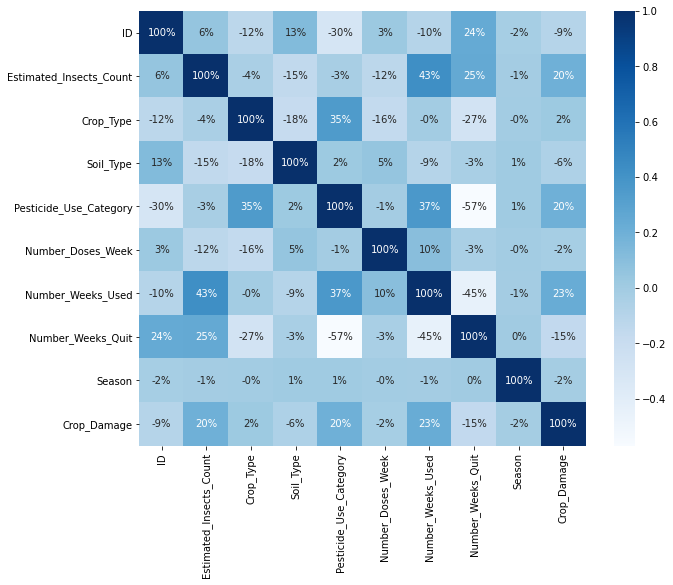

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,annot=True,fmt='.0%',cmap='Blues')

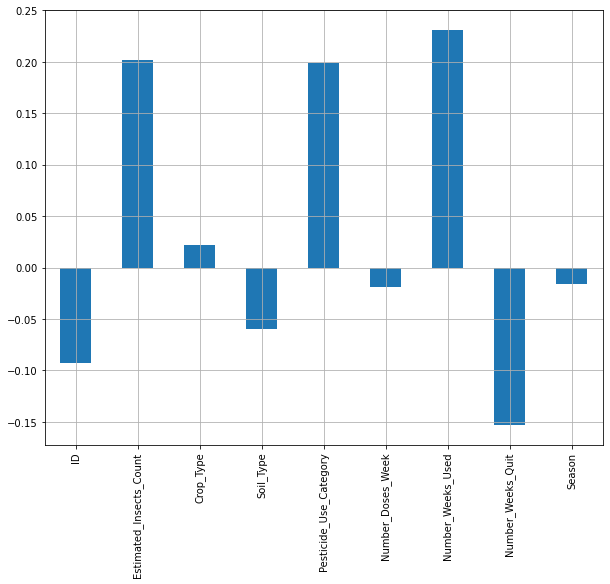

In [30]:
plt.figure(figsize=(10,8))
df.drop('Crop_Damage',axis=1).corrwith(df['Crop_Damage']).plot(kind='bar',grid=True)
plt.show()

In [31]:
#Graphical representation of correlation of crop damage with other columns

Univariate Analysis

{'bodies': [<matplotlib.collections.PolyCollection at 0x184cfe52e20>],
 'cmeans': <matplotlib.collections.LineCollection at 0x184cfe52c70>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x184cfe61310>,
 'cmins': <matplotlib.collections.LineCollection at 0x184cfe61610>,
 'cbars': <matplotlib.collections.LineCollection at 0x184cfe61910>}

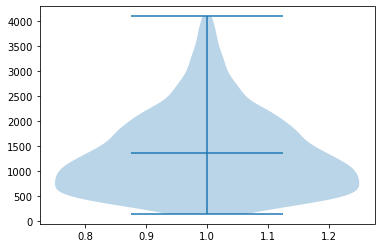

In [32]:
plt.violinplot(df['Estimated_Insects_Count'],showmeans=True)

In [33]:
#Maximum 'Estimated_Insects_Count' is between 500 and 1000

<AxesSubplot:xlabel='Pesticide_Use_Category', ylabel='count'>

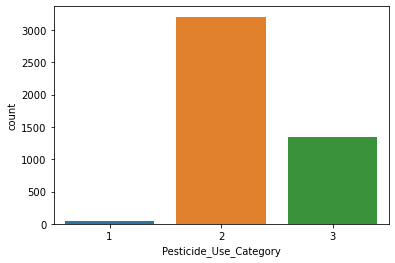

In [34]:
sns.countplot(df['Pesticide_Use_Category'])

In [35]:
#Pesticide_Use_Category - Type of pesticide uses (1-Never,2-Previously used,3-Currently using)
# Never used pesticide is the lowest,previously used is highest.

<AxesSubplot:xlabel='Crop_Type', ylabel='count'>

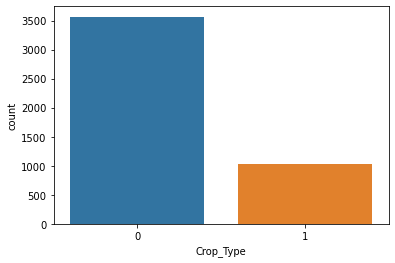

In [36]:
sns.countplot(df['Crop_Type'])

In [37]:
#Crop type 0 is much higher to crop type 1

Bivariate Analysis

<AxesSubplot:xlabel='Pesticide_Use_Category', ylabel='count'>

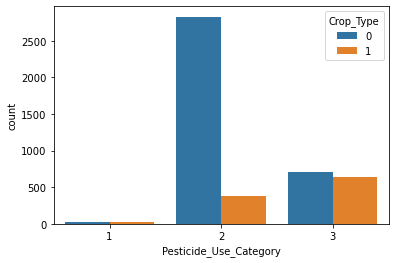

In [38]:
sns.countplot(x='Pesticide_Use_Category',hue='Crop_Type',data=df)

In [39]:
#crop type was maximum when pesticide was used , being used pesticide(currently) cropy type growith is more or less equal
#crop growth is minimal when pesticide not used

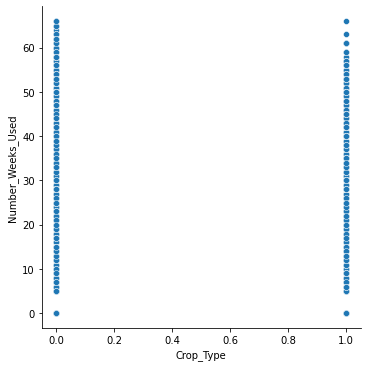

In [40]:
sns.relplot(x='Crop_Type',y='Number_Weeks_Used',data=df)

In [41]:
#both crop type has been uniformly used in correlation to each other

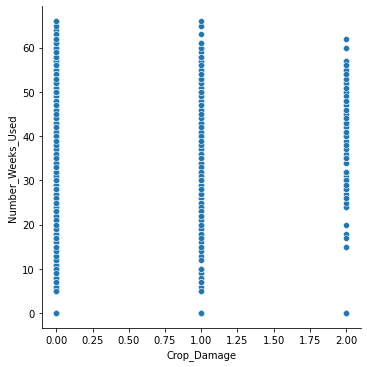

In [42]:
sns.relplot(x='Crop_Damage',y='Number_Weeks_Used',data=df)

In [43]:
#Crop_Damage -Crop damage category(0=alive,1=Damage due to other causes,2=Damage due to pesticide)
#in relation to number of weeks used crop alive rate and damaged is more or less same 

ID                             AxesSubplot(0.125,0.71587;0.168478x0.16413)
Estimated_Insects_Count     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Crop_Type                   AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Soil_Type                   AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Pesticide_Use_Category        AxesSubplot(0.125,0.518913;0.168478x0.16413)
Number_Doses_Week          AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Number_Weeks_Used          AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Number_Weeks_Quit          AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Season                        AxesSubplot(0.125,0.321957;0.168478x0.16413)
Crop_Damage                AxesSubplot(0.327174,0.321957;0.168478x0.16413)
dtype: object

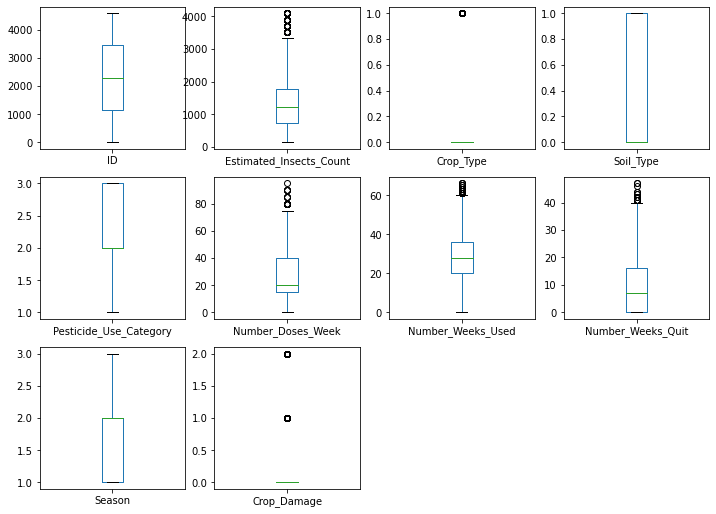

In [44]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(12,12))

In [45]:
#Estimated insect count,number doses week, number weeks used, number weeks quit has good amount of outliers

In [46]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(4599, 10)

In [47]:
#changing the values into positive and checking and the shape

In [48]:
threshold=3
df_new=df[(z<3).all(axis=1)]
df_new.shape

(4370, 10)

In [49]:
#after removing outliers, the new value has 4370 rows and 10 columns

In [50]:
percentage_loss_data =(((4599-4370)/4599)*100)
percentage_loss_data

4.979343335507719

In [51]:
#percentage loss of data is 4.9 with which we can go ahead
#not much of data loss

In [52]:
#splitting the dataset into x and y

In [53]:
x=df_new.drop('Crop_Damage',axis=1)
x.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0,188,1,0,1,0,0,0,1
1,1,209,1,0,1,0,0,0,2
2,2,257,1,0,1,0,0,0,2
3,3,257,1,1,1,0,0,0,2
4,4,342,1,0,1,0,0,0,2


In [54]:
y=df_new['Crop_Damage']
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Crop_Damage, dtype: int64

In [55]:
#crop damage is our target column

In [56]:
print(x.shape,'\t\t',y.shape)

(4370, 9) 		 (4370,)


In [57]:
#checking the shape of both x and y after splitting

In [58]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [59]:
#removing the skewness using power_transform

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [61]:
#scaling the values of x

In [62]:
#as the target type is multinomial type, we are import the following algorithms

In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [64]:
best_rstate=0
accu=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    svc=SVC(kernel='rbf')
    svc.fit(x_train,y_train)
    y_pred=svc.predict(x_test)
    tempaccu=accuracy_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
print(f"Best accuracy {accu*100} found on random state {best_rstate}")

Best accuracy 88.32951945080092 found on random state 192


In [65]:
# The best accuracy score is 88.32 found on random state 192 which is quite good

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=192,stratify=y)

In [67]:
#training and testing the dataset with best random state 192

Using GridSeachCV to find the best parameters

In [68]:
model=[SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),AdaBoostClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm)*100)
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print(cross_val_score(m,x,y,cv=5).mean()*100)
    print('**********************************************')
    print('\n')

Accuracy score of SVC() is:
85.81235697940504
[[745   1]
 [123   5]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       746
           1       0.83      0.04      0.07       128

    accuracy                           0.86       874
   macro avg       0.85      0.52      0.50       874
weighted avg       0.85      0.86      0.80       874

75.81235697940502
**********************************************


Accuracy score of DecisionTreeClassifier() is:
79.86270022883295
[[654  92]
 [ 84  44]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       746
           1       0.32      0.34      0.33       128

    accuracy                           0.80       874
   macro avg       0.60      0.61      0.61       874
weighted avg       0.80      0.80      0.80       874

45.90389016018307
**********************************************


Accuracy score of KNeighborsClassifier() is:
84.4393592

In [69]:
#from the above model SVC is best as the diff between accuracy and cross val is min

In [70]:
from sklearn.model_selection import GridSearchCV
svc_2=SVC(gamma='scale',kernel='linear')
svc_2.fit(x,y)
pred=svc_2.predict(x_test)
print("Final accuracy :",accuracy_score(y_test,pred)*100)

Final accuracy : 85.35469107551488


In [71]:
from sklearn.model_selection import GridSearchCV
parameters=({'C':[1,10],'gamma':[1,0.1,0.001], 'kernel':['linear','rbf']})
svc=SVC()


clf = GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [72]:

pred=clf.predict(x_test)
print("Final accuracy :",accuracy_score(y_test,pred)*100)

Final accuracy : 85.81235697940504


In [73]:
#on further refining through GridSearchCV using SVC with its parameters the accuracy score is 85.81 which is quite good

In [74]:
import joblib
filename='model.pkl'
joblib.dump(clf,open(filename,'wb'))

In [75]:
#saving the model

# Test Data

In [76]:
df1=pd.read_csv('test_agriculture.csv')
df1.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [77]:
df1.shape

(1199, 9)

In [78]:
#checking the shape of the test dataset
#there are 1199 rows and 9 columns

In [79]:
df1.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [80]:
#null values exits in Number_Weeks_Used

In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


In [82]:
#ID is object datatype, number of weeks used in float, rest all are int

In [83]:
df1['Number_Weeks_Used']=df1['Number_Weeks_Used'].fillna(df1['Number_Weeks_Used'].mean())

In [84]:
#filling in the null values of number of weeks used

In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
le=LabelEncoder()
df1['ID']=le.fit_transform(df1['ID'])

In [87]:
#chaging the ID column to numeric through label encoding

In [88]:
df1.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [89]:
#now no null values

In [90]:
from scipy.stats import zscore
z_new=np.abs(zscore(df1))
z_new.shape

(1199, 9)

In [91]:
#converting the datset into positive

In [92]:
threshold=3
df1_new=df1[(z_new<3).all(axis=1)]


df1_new.shape

(1160, 9)

In [93]:
#after removing the outliers the value is 1160 rows and 9 columns

In [94]:
import joblib

In [95]:
fitted_model=joblib.load(open('model.pkl','rb'))

In [96]:
#importing the model to test the new dataset

In [97]:
fitted_model

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [1, 0.1, 0.001],
                         'kernel': ['linear', 'rbf']})

In [98]:
#checking the attribute of the fitted model with its attirbute

In [99]:
predict=fitted_model.predict(df1_new)

In [101]:
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
# the predicted values